In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [135]:
titantic = pd.read_csv('./train.csv')

In [136]:
titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
len(titantic['PassengerId']) # Number of passengers on this dataset.

891

In [138]:
# note, Titantic had 1503 people, 1317 being passengers

In [139]:
titantic.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [140]:
titantic_null = titantic.isnull().sum()

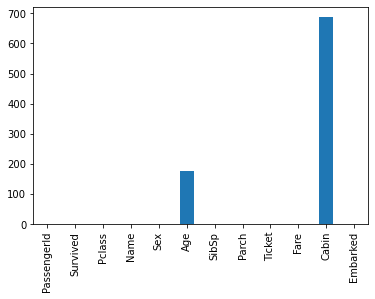

In [141]:
titantic_null.plot(kind='bar') 

In [142]:
titantic_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

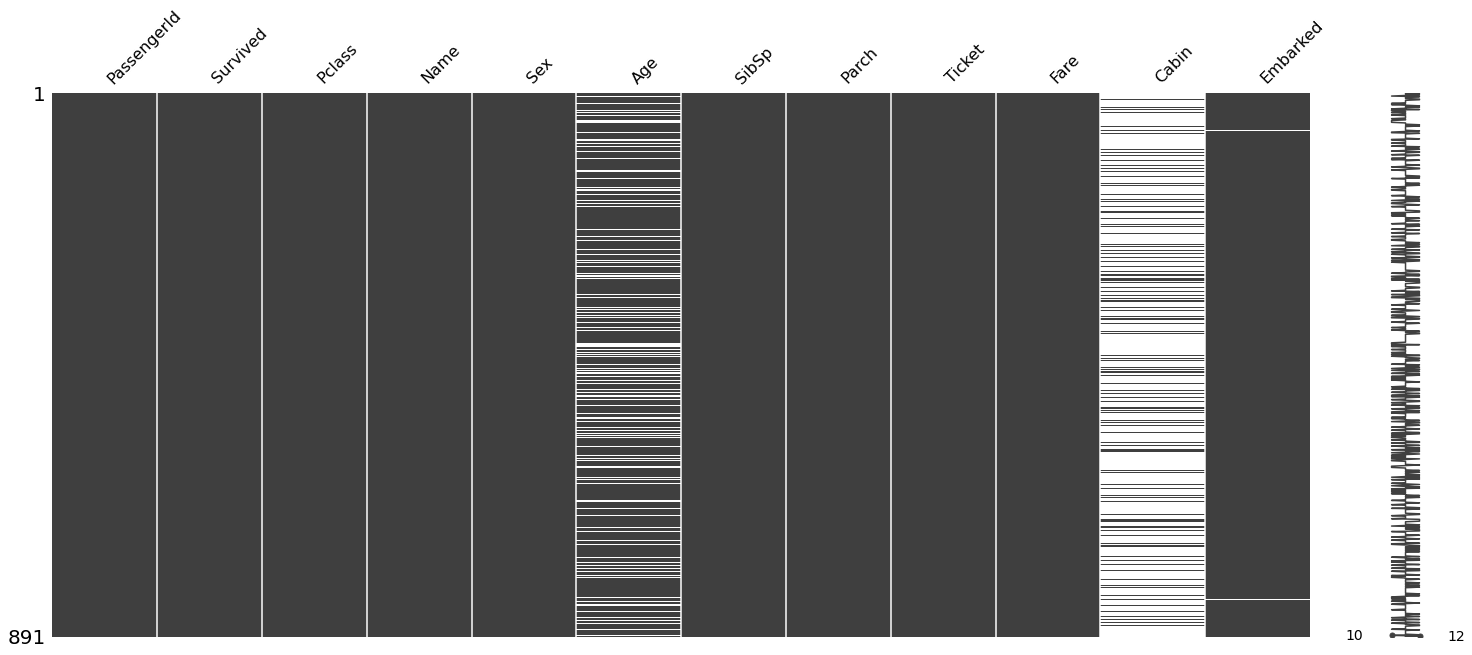

In [143]:
msno.matrix(titantic)

Cabin information is missing from most of the passengers with 687 NaN Cells
Second is Age at 177 NaN cells

In [144]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
titantic = titantic.dropna(subset=['Embarked'])

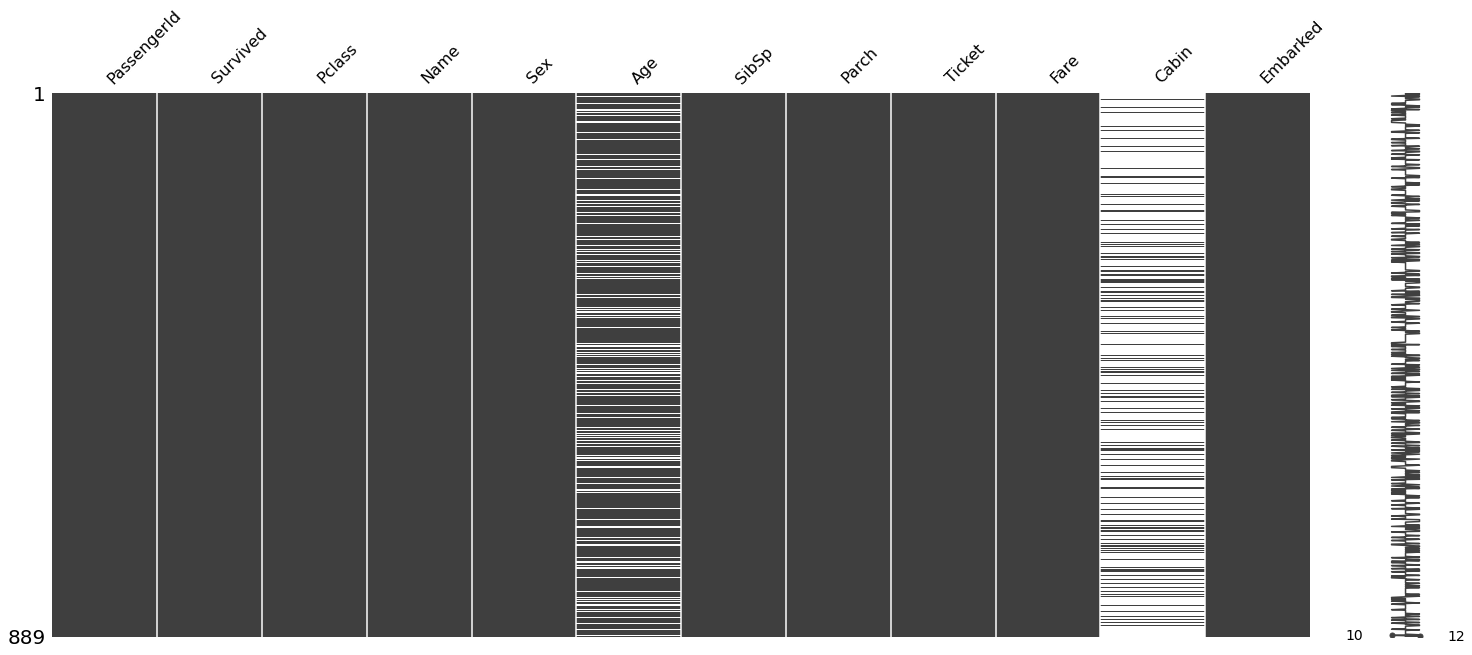

In [146]:
msno.matrix(titantic)

In [147]:
titantic['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [148]:
# Source https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
titantic['Cabin'] = titantic['Cabin'].replace(np.nan, '¯\(ツ)/¯').copy()

<ipython-input-148-07c68f369c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic['Cabin'] = titantic['Cabin'].replace(np.nan, '¯\(ツ)/¯').copy()


In [149]:
# Using a copy(), we save the old DataFrame
# Check w/ JoBeth for followup

In [150]:
# Ha, this is cute

In [151]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [152]:
titantic['SibSp'] + titantic['Parch']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 889, dtype: int64

In [153]:
titantic['FamilyCount'] = titantic['SibSp'] + titantic['Parch']

<ipython-input-153-01cd96921cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic['FamilyCount'] = titantic['SibSp'] + titantic['Parch']


In [154]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [155]:
 #[True for i in titantic['Name'] if i in 'Rev.']

In [156]:
titantic['Name'].str.contains('Rev.').astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: Name, Length: 889, dtype: int64

In [157]:
titantic['IsReverend'] = titantic['Name'].str.contains('Rev.').astype(int)

<ipython-input-157-e2896fa53f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titantic['IsReverend'] = titantic['Name'].str.contains('Rev.').astype(int)


In [159]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [160]:
pd.get_dummies(titantic[['Embarked']])

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [161]:
pd.get_dummies(titantic[['Sex']])

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [162]:
pd.Series([i.split() for i in titantic['Name']]).value_counts()

[Hart,, Mrs., Benjamin, (Esther, Ada, Bloomfield)]     1
[Petroff,, Mr., Pastcho, ("Pentcho")]                  1
[Levy,, Mr., Rene, Jacques]                            1
[Ling,, Mr., Lee]                                      1
[Slayter,, Miss., Hilda, Mary]                         1
                                                      ..
[Downton,, Mr., William, James]                        1
[Dick,, Mrs., Albert, Adrian, (Vera, Gillespie)]       1
[Lurette,, Miss., Elise]                               1
[Graham,, Mr., George, Edward]                         1
[Shelley,, Mrs., William, (Imanita, Parrish, Hall)]    1
Length: 889, dtype: int64

In [165]:
[i.split() for i in titantic['Name']]

[['Braund,', 'Mr.', 'Owen', 'Harris'],
 ['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)'],
 ['Heikkinen,', 'Miss.', 'Laina'],
 ['Futrelle,', 'Mrs.', 'Jacques', 'Heath', '(Lily', 'May', 'Peel)'],
 ['Allen,', 'Mr.', 'William', 'Henry'],
 ['Moran,', 'Mr.', 'James'],
 ['McCarthy,', 'Mr.', 'Timothy', 'J'],
 ['Palsson,', 'Master.', 'Gosta', 'Leonard'],
 ['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)'],
 ['Nasser,', 'Mrs.', 'Nicholas', '(Adele', 'Achem)'],
 ['Sandstrom,', 'Miss.', 'Marguerite', 'Rut'],
 ['Bonnell,', 'Miss.', 'Elizabeth'],
 ['Saundercock,', 'Mr.', 'William', 'Henry'],
 ['Andersson,', 'Mr.', 'Anders', 'Johan'],
 ['Vestrom,', 'Miss.', 'Hulda', 'Amanda', 'Adolfina'],
 ['Hewlett,', 'Mrs.', '(Mary', 'D', 'Kingcome)'],
 ['Rice,', 'Master.', 'Eugene'],
 ['Williams,', 'Mr.', 'Charles', 'Eugene'],
 ['Vander', 'Planke,', 'Mrs.', 'Julius', '(Emelia', 'Maria', 'Vandemoortele)'],
 ['Masselmani,', 'Mrs.', 'Fatima'],
 ['Fynney,', 'Mr.', 'Joseph'

In [166]:
titles = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'Major.', 'Mlle.', 'Col.', 'Jonkheer.', 'Ms.', 'Don.', 'Mme.', 'Capt.']

## Exploratory Analysis

In [167]:
titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


#### 1, What was the overall survival rate?

In [168]:
titantic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [169]:
f'Overall Survival Rate was {round(340/(340+549) * 100,2)} %'

'Overall Survival Rate was 38.25 %'

#### 2, Which Gender fared the worst, their survival rate?

In [170]:
titantic.groupby(by='Sex')[['Sex', 'Survived']].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    312.0  0.740385  0.439128  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [171]:
titantic.groupby(by='Sex')[['Sex', 'Survived']].sum()

,Survived
Sex,
female,231
male,109


In [172]:
f'Male Survival Rate was {round(109/(577) * 100,2)} %'

'Male Survival Rate was 18.89 %'

In [173]:
f'Female Survival rate was {round(231/(312) * 100,2)} %'

'Female Survival rate was 74.04 %'

In [174]:
f' Men fared the worst with a {100-18.89} % casualty rate'

' Men fared the worst with a 81.11 % casualty rate'

#### 3, Survival rate per Pclass?

In [175]:
titantic.groupby(by='Pclass')[['Pclass', 'Survived']].sum()

,Pclass,Survived
Pclass,,
1,214,134
2,368,87
3,1473,119


In [176]:
f'First class had a {round(134/(214+134)*100,2)} % survival rate'

'First class had a 38.51 % survival rate'

In [177]:
f'Second class had a {round(87/(87+(368/2))*100,2)} % survival rate'

'Second class had a 32.1 % survival rate'

In [178]:
f'Third class had a {round(119/((1473/3)+119)*100,2)} % survival rate'

'Third class had a 19.51 % survival rate'

In [179]:
# note, by summing the total amount of passengers into 1st, 2nd or 3rd class, they are identified by an integer
# which means nothing for analysis, so in this case we are taking that meaningless sum
# then calculating the true number of passengers in that respective passenger class

#### 4, Did any reverends survive? How many?

In [180]:
list(titantic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'FamilyCount',
 'IsReverend']

In [181]:
titantic.groupby(by='IsReverend')[['IsReverend','Survived']].sum()

,IsReverend,Survived
IsReverend,,
0,0,340
1,6,0


In [182]:
f'No Reverends survived the Titantic'

'No Reverends survived the Titantic'

#### 5, What is the Survival rate for cabins marked ¯\(ツ)/¯ ?

In [183]:
titantic.groupby(by='Cabin')[['Survived', 'Cabin']].describe()

Survived                                             
           count      mean       std  min  25%  50%  75%  max
Cabin                                                        
A10          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
A14          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
A16          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
A19          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
A20          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
...          ...       ...       ...  ...  ...  ...  ...  ...
F38          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
F4           2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
G6           4.0  0.500000  0.577350  0.0  0.0  0.5  1.0  1.0
T            1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
¯\(ツ)/¯    687.0  0.299854  0.458528  0.0  0.0  0.0  1.0  1.0

[147 rows x 8 columns]

In [184]:
titantic.groupby(by='Cabin')[['Survived', 'Cabin']].sum()

,Survived
Cabin,
A10,0
A14,0
A16,1
A19,0
A20,1
...,...
F38,0
F4,2
G6,2


In [185]:
f'Survival Rate for people in ¯(ツ)/¯ Cabins is {round(206/687 * 100,2)} %'

'Survival Rate for people in ¯(ツ)/¯ Cabins is 29.99 %'

#### 6, Survival rate for people whose age is NaN?

In [186]:
titantic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [208]:
titantic[['Age']].isnull()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,True
889,False


In [204]:
titantic.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                   ¯\(ツ)/¯
Embarked                      Q
FamilyCount                   0
IsReverend                    0
Name: 5, dtype: object